# 1. Title: Constructing an Inference Model with Multiple Linear Regression

### GROUP 15

Members:
- Mark Cao 
- Aarush Agarwal
- Edward Kim
- Ibrahim Saeed
  
Course: STAT301 102

April 16th, 2025.
Revised April 18, 2025.

# Libraries

In [1]:
# Main Developer: Mark

library(tidyverse)
library(repr)
library(broom)
library(leaps)
library(moderndive)
library(MASS)
library(car)
library(rsample)
library(ggplot2)
library(reshape2)

print("LIBRARIES LOADED")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




[1] "LIBRARIES LOADED"


# 2. Introduction

Sleep plays a crucial role in maintaining physical and mental health. Disruptions in sleep quality or duration have been consistently associated with increased stress levels, cardiovascular risk, and metabolic issues such as obesity. As lifestyles become more demanding and sedentary, understanding how daily habits impact sleep health is both timely and essential. For this project, we use the Sleep Health and Lifestyle Dataset which contains 374 observations and 13 variables, covering sleep quality, daily activity, stress, and cardiovascular health. It includes numerical and categorical data, such as sleep duration (hours), self-reported sleep quality (1-10 scale), physical activity level (minutes/day), stress level (1-10 scale), BMI category, and presence of sleep disorders (None, Insomnia, Sleep Apnea). This dataset helps analyze the relationship between lifestyle choices and sleep health. 

Our inference-based research question is as follows:
We wish to examine the association between a person's sleep duration and health-routine-related predictors such as BMI, physical activity level, sleep disorder, stress level, etc.
Our question is primarily focused on inference, as our goal is to examine association intead of predicting values. By examining the model’s coefficients, we can interpret how each factor contributes to changes in sleep duration, providing insights into potential lifestyle adjustments for better sleep health.

There’s already quite a bit of research highlighting how lifestyle choices are connected to sleep health. For example, Grandner (2017) points out that behaviors like physical activity and diet play an important role in sleep quality. Medic et al. (2017) explain how poor sleep can affect both mental and physical health, especially through stress and cardiovascular issues. Similarly, Khan and Aouad (2017) show links between sleep loss and cardiovascular risk factors like high BMI and blood pressure. These studies help back up the relevance of the variables we’re exploring and show why it makes sense to look for associations between them and sleep disorders in this project.

# 3. Methods and Results

### a) Data 

In [2]:
# Main Developer: Mark

file_url <- "https://drive.google.com/uc?export=download&id=1ZjZvLl5dUzHEF8ouimlTg8t0MorhjzVA"
sleep_data <- read.csv(file_url)
head(sleep_data)
set.seed(114514) # SEED, DO NOT CHANGE

,Person.ID,Gender,Age,Occupation,Sleep.Duration,Quality.of.Sleep,Physical.Activity.Level,Stress.Level,BMI.Category,Blood.Pressure,Heart.Rate,Daily.Steps,Sleep.Disorder
,<int>,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>
1,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
2,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
4,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
6,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia


Dataset used: Laksika Tharmalingam. 2024. Sleep Health and Lifestyle Dataset. Retrieved from https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/data

A detailed description of all the variables in the dataset is as follows:-

| Variable | Type of Variable | Description |
| -------- | --------------- | ----------- |
| Person ID | Numeric | Unique identifier for each individual |
| Gender | Categorical | Gender of the individual (Male/Female) |
| Age | Numeric | Age of the individual in years |
| Occupation | Categorical | Job or profession of the individual |
| Sleep Duration | Numeric | Number of hours a person sleep per day |
| Quality of Sleep | Numeric | Subjective sleep quality rating (1-10) |
| Physical Activity Level | Numeric | Minutes of physical activity of an individual per day |
| Stress Level | Numeric | Subjective stress level of a person (1-10) |
| BMI Category | Categorical | BMI classification (Underweight, Normal, Overweight) |
| Blood Pressure  | Numeric | The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure. |
| Heart Rate | Numeric | Resting heart rate in beats per minute |
| Daily Steps | Numeric | Number of steps taken per day |
| Sleep Disorder | Categorical | Presence of a sleep disorder (None, Insomnia, Sleep Apnea) |

#### The source of the dataset states that the set is synthetic and was generated for illustrative purposes.

### b) Exploratory Data Analysis (EDA)

#### Tidying and pre-selection

Tidying the data for modelling:
-  We remove the PersonID column, as it provides no statistical information.
-  For readability, we replace all column names, categorical level names, and other string data with versions without periods or whitespace in between characters.
-  For readability we replace these column names: "QualityofSleep" -> "SleepQuality", and "PysicalActivityLevel" -> "PhysicalActivity".
-  We perform factor conversion to all categorical variables.
- We replace the "BloodPressure" column with two new columns "SystolicPressure" and "DiastolicPressure" to maintain proper numerical columns for modelling.
- For simplicity we replace all entries of BMICategory with either "Normal" and "Overweight" if not "Normal".
- For simplicity we replace all SleepDisorder entries with either "None" for no sleep disorder and "Present" for any kind of sleep disorder.
- For future interpretability we replace the DailySteps column with Daily1000Steps for the number of daily steps of an individual divided by 1000.
- For future interpretability we divide all entries in PhysicalActivity by 60 to represent daily physical activity level of an individual in hours instead of minutes.
  
We set the reference level for each categorical variable as the following:
- BMICategory: "Normal"
- SleepDisorder: "None"
- Gender: "Male"
- Occupation: "Accountant"

In terms of pre-selection, the only complete removal is of the PersonID column.


In [3]:
# Edward, Mark

# TIDYING AND PRESELECTION CODE, DETAILS ARE IN ABOVE DESCRIPTION
sleep_tidy <- sleep_data |>
dplyr::select(-`Person.ID`) %>%
{ names(.) <- names(.) |> str_replace_all("[\\.\\s]", "")
.} %>%
mutate(Occupation = str_replace_all(Occupation, "[\\.\\s]", "")) |>
mutate(PhysicalActivityLevel = PhysicalActivityLevel / 60) |>
separate(BloodPressure, into = c("SystolicPressure", "DiastolicPressure"), sep = "/") |>
mutate(across(c(SystolicPressure, DiastolicPressure), as.numeric)) |>
mutate(BMICategory = if_else(str_detect(BMICategory, "Obese"), "Overweight", BMICategory)) |>
mutate(BMICategory = str_replace(BMICategory, "Normal Weight", "Normal")) |>
mutate(SleepDisorder = if_else(SleepDisorder == "None", "None", "Present")) |>
mutate(Daily1000Steps = DailySteps / 1000) |>
dplyr::select(-DailySteps) |>
rename(SleepQuality = QualityofSleep, PhysicalActivity = PhysicalActivityLevel) |>
mutate(
    BMICategory = fct_relevel(BMICategory, "Normal"),
    SleepDisorder = fct_relevel(SleepDisorder, "None"),
    Gender = fct_relevel(Gender, "Male"),
    Occupation = fct_relevel(Occupation, "Accountant")
  ) |>
mutate(across(where(is.character), as_factor))

head(sleep_tidy) 
nrow(sleep_tidy)

,Gender,Age,Occupation,SleepDuration,SleepQuality,PhysicalActivity,StressLevel,BMICategory,SystolicPressure,DiastolicPressure,HeartRate,SleepDisorder,Daily1000Steps
,<fct>,<int>,<fct>,<dbl>,<int>,<dbl>,<int>,<fct>,<dbl>,<dbl>,<int>,<fct>,<dbl>
1,Male,27,SoftwareEngineer,6.1,6,0.7,6,Overweight,126,83,77,None,4.2
2,Male,28,Doctor,6.2,6,1.0,8,Normal,125,80,75,None,10.0
3,Male,28,Doctor,6.2,6,1.0,8,Normal,125,80,75,None,10.0
4,Male,28,SalesRepresentative,5.9,4,0.5,8,Overweight,140,90,85,Present,3.0
5,Male,28,SalesRepresentative,5.9,4,0.5,8,Overweight,140,90,85,Present,3.0
6,Male,28,SoftwareEngineer,5.9,4,0.5,8,Overweight,140,90,85,Present,3.0


[1] 374

We note again that the new tidy and pre-selected dataset contains:

- "SleepQuality" name change from "QualityofSleep"
- "PhysicalActivity" as HOURS of physical activity per day instead of minutes
- "BMICategory" as either normal or overweight
- "SystolicPressure" from the systolic part of the blood pressure column
- "DiastolicPressure" from the diastolic part of the blood pressure column
- "SleepDisorder" as either None or Present
- "Daily1000Steps" for steps per day divided by 1000

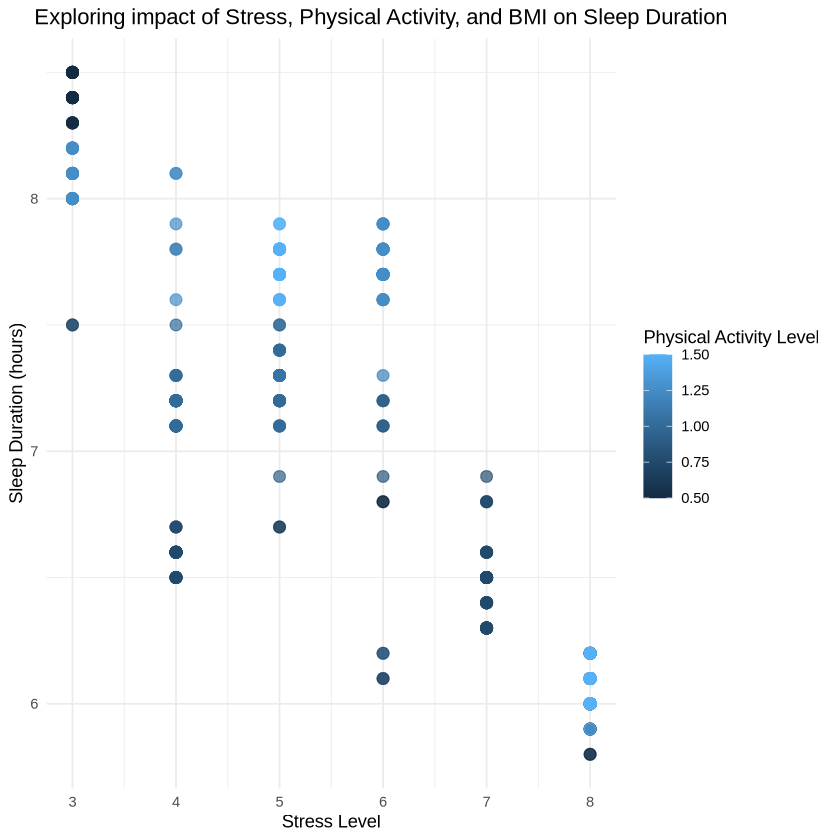

In [4]:
# Main Developer: Aarush, Ibrahim

plot <- ggplot(sleep_tidy, aes(x = StressLevel, y = SleepDuration, color = PhysicalActivity)) +
  geom_point(size = 3, alpha = 0.7) +                                                 
  labs(title = "Exploring impact of Stress, Physical Activity, and BMI on Sleep Duration",
       x = "Stress Level",
       y = "Sleep Duration (hours)",
       color = "Physical Activity Level") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.1))

plot

From this scatterplot, we can see higher stress levels are associated with shorter sleep duration. People with more physical activity tend to sleep longer, suggesting that physical activity may help buffer the negative effects of stress on sleep.

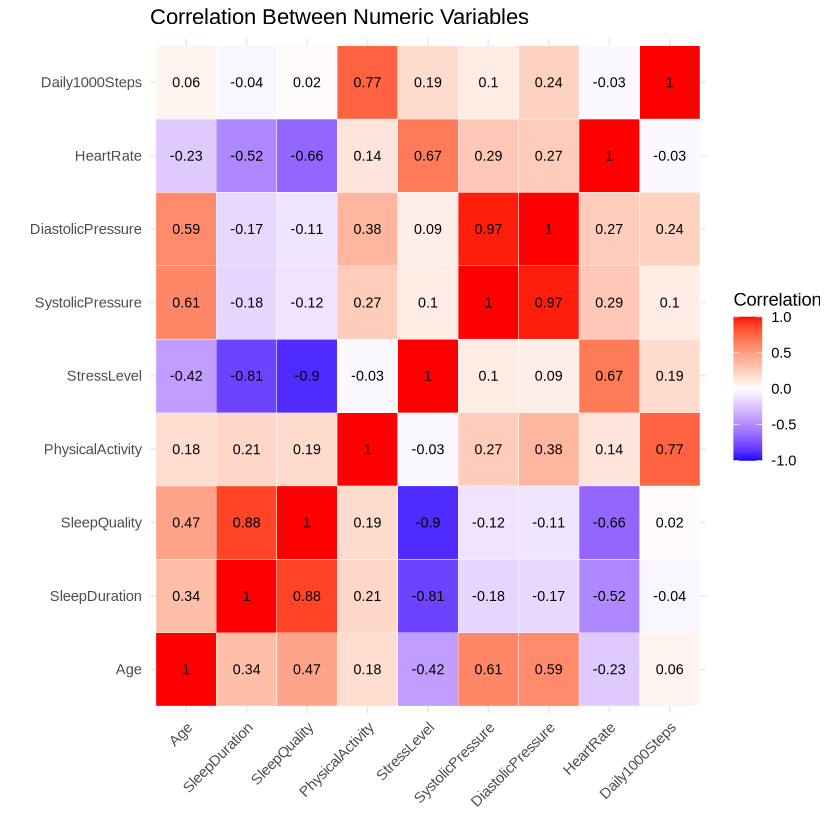

In [5]:
# Main Developer: Aarush, Ibrahim

num_vars <- sleep_tidy |>
  dplyr::select(where(is.numeric))
cor_matrix <- round(cor(num_vars, use = "complete.obs"), 2)

melted_cor <- melt(cor_matrix)
ggplot(data = melted_cor, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile(color = "white") +
  scale_fill_gradient2(low = "blue", mid = "white", high = "red", 
                       midpoint = 0, limit = c(-1, 1), name = "Correlation") +
  geom_text(aes(label = value), color = "black", size = 3) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
  labs(title = "Correlation Between Numeric Variables",
       x = "", y = "")

In this heatmap, we can see the pairwise correlations between numeric variables. We observe strong negative correlations between Sleep Duration, Sleep Quality, and Stress Level, indicating that higher stress is associated with poorer sleep outcomes. A very strong positive correlation is seen between Systolic and Diastolic Pressure, suggesting potential multicollinearity if both are used in modeling. This visualization helps identify variable relationships and warns of redundant predictors.

In [6]:
# Aarush, Ibrahim
sum(is.na(sleep_tidy))

[1] 0

We can see that there are no NAs in the dataset.

In [7]:
# Main Developer: Aarush, Ibrahim

sleep_tidy %>%
  count(BMICategory, SleepDisorder, Gender) %>%
  arrange(desc(n))

BMICategory,SleepDisorder,Gender,n
<fct>,<fct>,<fct>,<int>
Normal,None,Male,129
Overweight,Present,Female,96
Normal,None,Female,71
Overweight,Present,Male,43
Overweight,None,Female,11
Normal,Present,Male,9
Overweight,None,Male,8
Normal,Present,Female,7


This table shows how participants are grouped by BMI, sleep disorder status, and gender. It helps us check data balance and spot issues like rare categories (e.g., "Normal Weight"), which may need fixing before modeling.

# c) Methods: Plan

### INFERENCE QUESTION:
### To determine whether there is an association between the response variable Sleep Duration and various health and routine factors such as Physical Activity, Occupation, Age, and Stress Level.

We use multiple linear regression, as the response variable is a cotinuous outcome variable, and because MLR can work with multiple input variables, factors, and categorical variables. MLR is also a common method for inference which is the main goal of this project.

### Assumptions:
- Linear relationship between Sleep duration(response) and the person's physical and mental health(input)
- Errors are independent
- Conditional distribution of the error term is normal
- Variances of the error term are equal
- Furthermore, I will use variable selection methods to minimize the effect of multicollinearity.
### Potential drawbacks and limitations:
- Even though sleep duration is a continuous variable, the relationship might not be perfectly linear
- Potential issues with our variable selection step.

### Data splitting

We first split the data 50%/50% for selection/inference:

In [8]:
# Edward
# DATASET SPLITTING

# Split data 50% / 50% for selection set and inference set using initial_split()
data_split <- sleep_tidy |> initial_split(prop = 0.5, strata = SleepDuration)
sleep_selection <- training(data_split)
sleep_inference <- testing(data_split)

# Print the number of rows for each set:
print(paste("Selection N-ROWS:", nrow(sleep_selection)))
print(paste("Inference N-ROWS:", nrow(sleep_inference)))

[1] "Selection N-ROWS: 187"
[1] "Inference N-ROWS: 187"


### Initial VIF check
First we do a quick VIF check on the full model using the selection set:

In [9]:
# Edward, Mark
# INITIAL VIF CHECK

# Generate full model using selection set
sleep_full <- lm(SleepDuration~., data=sleep_selection)
# Run VIF on the full model
vif(sleep_full)

,GVIF,Df,GVIF^(1/(2*Df))
Gender,17.252348,1,4.153595
Age,40.231107,1,6.342800
Occupation,5651.340832,9,1.616043
SleepQuality,49.476411,1,7.033947
PhysicalActivity,7.060985,1,2.657251
StressLevel,29.481469,1,5.429684
BMICategory,25.472042,1,5.046983
SystolicPressure,170.903709,1,13.073015
DiastolicPressure,175.005118,1,13.228950
HeartRate,5.725148,1,2.392728


### Variables with very high scaled-GVIF:

SystolicPressure, DiastolicPressure.

### VIF-based selection

Here we choose to manually remove the "DiastolicPressure" column from the model:

- Due to very high level of collinearity with SystolicPressure
- To simplify the model and increase performance while keeping a similar representation to having both blood pressure values

In the code below we remove column "DiastolicPressure" from both the selection set and inference set.

In [10]:
# Edward

# MANUALLY REMOVE DIASTOLIC PRESSURE COLUMN
# Here we use dplyr::select(-any_of()) to remove errors for when the code cell is re-run independently
sleep_selection <- sleep_selection |> dplyr::select(-any_of("DiastolicPressure"))
sleep_inference <- sleep_inference |> dplyr::select(-any_of("DiastolicPressure"))

# Model selection

Here we use the updated selection set to refit the full model and perform stepAIC backward selection.

We choose stepAIC with backward selection:

- The main goal is inference with multiple linear regression with a continuous response variable
- The set of input variables contains multiple categorical variables
- The set of input variables contain categorical variables with many levels
- Bayesian criterion for a more conservative selection

In [11]:
# Edward, Mark

# RE-FIT FULL MODEL WITH SELECTION SET WITH PROBLEMATIC COLUMN REMOVED
sleep_full <- lm(SleepDuration~., data=sleep_selection)
# STEP AIC WITH FULL MODEL FROM SELECTION SET
aic_model <- stepAIC(sleep_full, direction = "backward", k = log(nrow(sleep_selection)))
print("SUMMARY:")
summary(aic_model)

Start:  AIC=-471.91
SleepDuration ~ Gender + Age + Occupation + SleepQuality + PhysicalActivity + 
    StressLevel + BMICategory + SystolicPressure + HeartRate + 
    SleepDisorder + Daily1000Steps

                   Df Sum of Sq     RSS     AIC
- Age               1    0.0066  8.5747 -477.00
- StressLevel       1    0.0127  8.5808 -476.86
- HeartRate         1    0.0284  8.5964 -476.52
- SleepDisorder     1    0.0285  8.5966 -476.52
- Gender            1    0.0854  8.6535 -475.29
<none>                           8.5681 -471.91
- Daily1000Steps    1    0.2677  8.8358 -471.39
- BMICategory       1    0.3718  8.9399 -469.20
- SystolicPressure  1    0.8426  9.4106 -459.60
- PhysicalActivity  1    1.8573 10.4254 -440.45
- SleepQuality      1    2.0000 10.5681 -437.91
- Occupation        9    6.4366 15.0047 -414.21

Step:  AIC=-477
SleepDuration ~ Gender + Occupation + SleepQuality + PhysicalActivity + 
    StressLevel + BMICategory + SystolicPressure + HeartRate + 
    SleepDisorder + Dai


Call:
lm(formula = SleepDuration ~ Gender + Occupation + SleepQuality + 
    PhysicalActivity + BMICategory + SystolicPressure + Daily1000Steps, 
    data = sleep_selection)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.85035 -0.09186 -0.00146  0.09412  1.32846 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    4.965297   0.743340   6.680 3.23e-10 ***
GenderFemale                   0.204983   0.077073   2.660 0.008567 ** 
OccupationDoctor               1.102097   0.106526  10.346  < 2e-16 ***
OccupationEngineer             0.987308   0.101483   9.729  < 2e-16 ***
OccupationLawyer               0.816089   0.127358   6.408 1.38e-09 ***
OccupationNurse                0.390003   0.136299   2.861 0.004745 ** 
OccupationSalesperson          0.921591   0.134935   6.830 1.42e-10 ***
OccupationSalesRepresentative  2.064800   0.276991   7.454 4.31e-12 ***
OccupationScientist            0.363145   0.246176   1.475

In [12]:
# Edward
# Code for printing the results of the stepAIC
full_vars <- attr(terms(sleep_full),"term.labels")
final_vars <- attr(terms(aic_model),"term.labels")
dropped_vars <- setdiff(full_vars, final_vars)
print("1.")
print("SELECTED VARIABLES:")
print(final_vars)
print("2.")
print("DROPPED VARIABLES:")
print(dropped_vars)
print("3.")
print("FINAL FORMULA:")
print(formula(aic_model))

[1] "1."
[1] "SELECTED VARIABLES:"
[1] "Gender"           "Occupation"       "SleepQuality"     "PhysicalActivity"
[5] "BMICategory"      "SystolicPressure" "Daily1000Steps"  
[1] "2."
[1] "DROPPED VARIABLES:"
[1] "Age"           "StressLevel"   "HeartRate"     "SleepDisorder"
[1] "3."
[1] "FINAL FORMULA:"
SleepDuration ~ Gender + Occupation + SleepQuality + PhysicalActivity + 
    BMICategory + SystolicPressure + Daily1000Steps


### Interpretation:

The output of the above code block contains the interpretation for the stepAIC output including the selected variables, dropped variables, and the final formula to be used to generate the inference model.


# Inference Model

Here we generate the inference model by running a new lm() with the AIC-selected formula and the inference set.

In [13]:
# Edward, Mark

# Construct inference model with new lm()
inference_model <- lm(formula(aic_model), data = sleep_inference)
# tidy
inference_results <- tidy(inference_model)

print("GENERAL RESULTS OF THE INFERENCE MODEL:")
print(inference_results)

[1] "GENERAL RESULTS OF THE INFERENCE MODEL:"
# A tibble: 17 × 5
   term                          estimate std.error statistic  p.value
   <chr>                            <dbl>     <dbl>     <dbl>    <dbl>
 1 (Intercept)                     6.18     0.970       6.37  1.72e- 9
 2 GenderFemale                    0.303    0.101       3.00  3.15e- 3
 3 OccupationDoctor                0.950    0.127       7.49  3.65e-12
 4 OccupationEngineer              0.882    0.121       7.28  1.18e-11
 5 OccupationLawyer                0.828    0.160       5.16  6.79e- 7
 6 OccupationManager               0.145    0.313       0.465 6.42e- 1
 7 OccupationNurse                 0.563    0.135       4.18  4.70e- 5
 8 OccupationSalesperson           0.787    0.149       5.29  3.69e- 7
 9 OccupationSalesRepresentative   1.34     0.339       3.95  1.13e- 4
10 OccupationScientist             0.680    0.206       3.31  1.16e- 3
11 OccupationSoftwareEngineer      0.770    0.210       3.67  3.19e- 4
12 Occupatio

# Results

### Results with a more interpretable version of the tidy(lm()) table.
Here we divide the results into two tables: one for Occupation, and one for all other predictors.
This is done for readability, as the categorical variable "Occupation" has 11 levels, while all other categorical variables each have 2 levels.

In [14]:
# Edward

# Add the correlation direction column
inference_results$direction <- ifelse(
  inference_results$p.value < 0.05,
  ifelse(inference_results$estimate > 0, "Positive", "Negative"), "Neither"
)
# Divide the two tables one for occupation another for everything else
occupation_vars <- inference_results[grepl("^Occupation", inference_results$term), ]
other_vars <- inference_results[
  !grepl("^Occupation|\\(Intercept\\)", inference_results$term),
]

print("1.")
print("OCCUPATION LEVELS (relative to reference: Accountant):")
print(occupation_vars)

print("2.")
print("ALL OTHER PREDICTORS:")
print(other_vars)

[1] "1."
[1] "OCCUPATION LEVELS (relative to reference: Accountant):"
# A tibble: 10 × 6
   term                          estimate std.error statistic  p.value direction
   <chr>                            <dbl>     <dbl>     <dbl>    <dbl> <chr>    
 1 OccupationDoctor                 0.950     0.127     7.49  3.65e-12 Positive 
 2 OccupationEngineer               0.882     0.121     7.28  1.18e-11 Positive 
 3 OccupationLawyer                 0.828     0.160     5.16  6.79e- 7 Positive 
 4 OccupationManager                0.145     0.313     0.465 6.42e- 1 Neither  
 5 OccupationNurse                  0.563     0.135     4.18  4.70e- 5 Positive 
 6 OccupationSalesperson            0.787     0.149     5.29  3.69e- 7 Positive 
 7 OccupationSalesRepresentative    1.34      0.339     3.95  1.13e- 4 Positive 
 8 OccupationScientist              0.680     0.206     3.31  1.16e- 3 Positive 
 9 OccupationSoftwareEngineer       0.770     0.210     3.67  3.19e- 4 Positive 
10 OccupationTeacher

# Results Visualization
Here we use a visualization of the confidence intervals and means of the estimates, separated by variable:

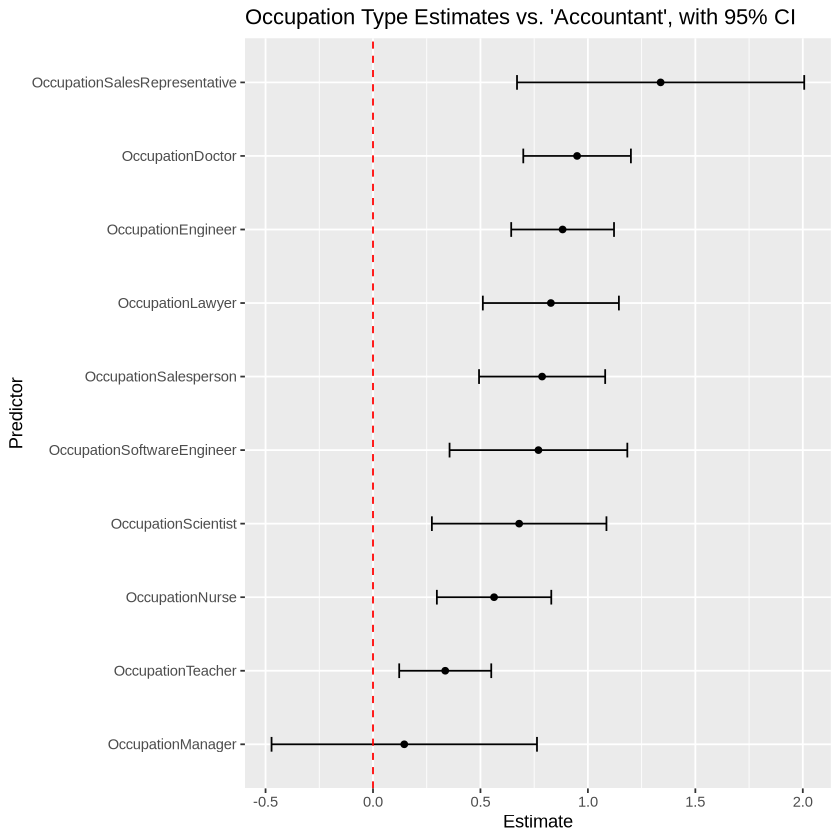

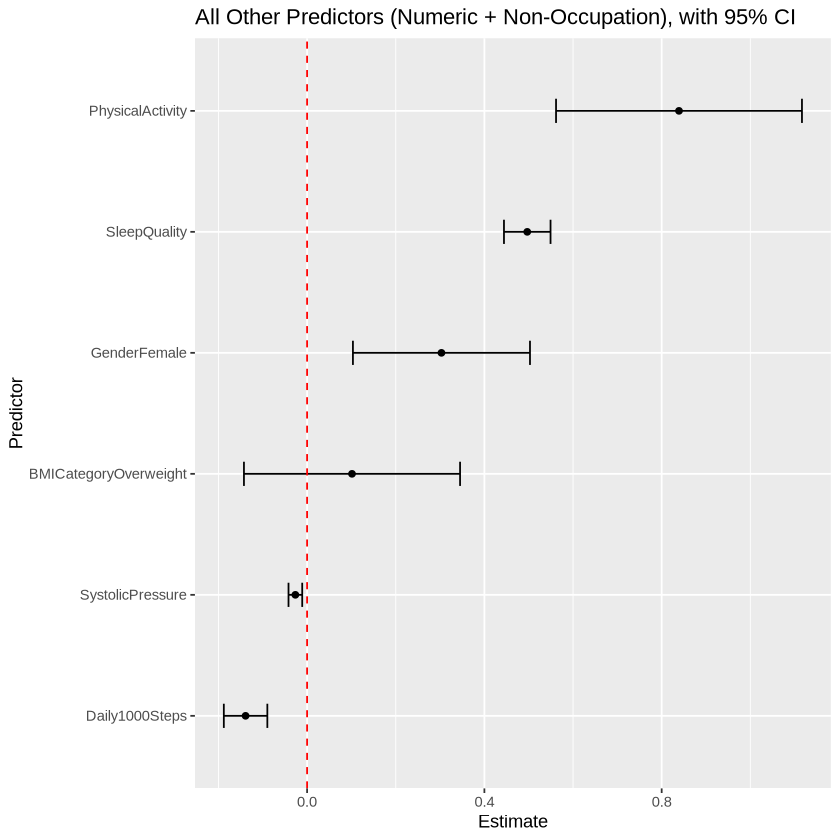

In [15]:
# Edward

# VISUALIZATION CODE
inference_results <- tidy(inference_model, conf.int = TRUE) |>
  filter(term != "(Intercept)") |>
  mutate(direction = ifelse(p.value < 0.05,
                            ifelse(estimate > 0, "Positive", "Negative"), "Neither"))
occupation_vars <- inference_results |> filter(grepl("^Occupation", term))
other_vars <- inference_results |> filter(!grepl("^Occupation", term))
# plot function
plot_ci <- function(data, title) {
  ggplot(data, aes(x = estimate, y = reorder(term, estimate))) +
    geom_point() +
    geom_errorbarh(aes(xmin = conf.low, xmax = conf.high), height = 0.2) +
    geom_vline(xintercept = 0, linetype = "dashed", color = "red") +
    labs(title = title, x = "Estimate", y = "Predictor")
}
# Plot for Occupation
plot_ci(occupation_vars, "Occupation Type Estimates vs. 'Accountant', with 95% CI")
# Plot for everything else
plot_ci(other_vars, "All Other Predictors (Numeric + Non-Occupation), with 95% CI")

These graphs represent a clean visualization of the significance of each predictor using mean and confidence interval, as well as showing the direction of association, all corresponding to results we have explained above. Here, the 95% confidence intervals do a good job of visualizing the significance (p-value) of each predictor as well.

# Results Findings:
From these stepAIC-selected inference-set model results, we conclude that the chosen factors indeed have a significant association with the response variable sleep duration.

We use the common threshold of p<0.05 to assess significance.

NOTE: THE SIGNIFICANCE VALUES FOR THE LEVELS OF THE CATEGORICAL VARIABLE OCCUPATION ARE PRODUCED IN ASSOCIATION WITH THE REFERENCE LEVEL "ACCOUNTANT", AND THE VALUES FOR THE OTHER NUMERICAL VARIABLES ARE PRODUCED IN ASSOCIATION WITH THE RESPONSE VARIABLE.

Namely:

- Higher values for SleepQuality and PhysicalActivity were found to be associated with longer sleep durations.
- Higher values for SystolicPressure and Daily1000Steps were found to be associated with shorter sleep durations.

Gender:

- Being female as opposed to male (reference level) showed association with longer sleep durations.

BMICategory:

- The "Overweight" category was not significantly different from the "Normal" reference group.

As for Occupations:

During the tidying process, the reference level for Occupation was set to "Accountant". Therefore we expect "OccupationAccountant" to be absorbed into the reference level (Intercept) row of the stepAIC summary.

- Compared to accountants, managers did not show a significant difference in sleep duration (p-value ≥ 0.05).
- All other occupations showed a higher sleep duration compared to accountants, and these differences were statistically significant.

In terms of inference, the only solid conclusion we can make is that overall, occupation, along with gender, sleep quality, physical activity, systolic pressure, and daily steps, does have a significant association with sleep duration.

# Performance 

### Adjusted R-squared and f-statistic p-value
Here we do a quick performance check with adjusted R^2 and f-stat p-value.

In [16]:
model_summary <- summary(inference_model)
model_summary


Call:
lm(formula = formula(aic_model), data = sleep_inference)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.66838 -0.16511  0.01408  0.18704  1.09437 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    6.175011   0.969690   6.368 1.72e-09 ***
GenderFemale                   0.303141   0.101183   2.996 0.003145 ** 
OccupationDoctor               0.949715   0.126853   7.487 3.65e-12 ***
OccupationEngineer             0.882325   0.121181   7.281 1.18e-11 ***
OccupationLawyer               0.827686   0.160369   5.161 6.79e-07 ***
OccupationManager              0.145494   0.312857   0.465 0.642491    
OccupationNurse                0.563397   0.134851   4.178 4.70e-05 ***
OccupationSalesperson          0.786902   0.148687   5.292 3.69e-07 ***
OccupationSalesRepresentative  1.338419   0.338529   3.954 0.000113 ***
OccupationScientist            0.680134   0.205767   3.305 0.001157 ** 
OccupationSoftwareEnginee

### Interpretation:
We see very good values for the adjusted R^2 and f-statistic p-value, indicating a strong fit of the model and statistical significance of the alternate hypothesis.

### Second VIF check
Here, we run a 2nd VIF check with the inference model and inference set just for a quick comparison:

In [17]:
# Optional 2ND VIF
vif(inference_model)

,GVIF,Df,GVIF^(1/(2*Df))
Gender,5.396765,1,2.323094
Occupation,76.049588,10,1.241809
SleepQuality,2.301760,1,1.517155
PhysicalActivity,4.720460,1,2.172662
BMICategory,7.874876,1,2.806221
SystolicPressure,7.685054,1,2.772193
Daily1000Steps,3.521317,1,1.876517


### Interpretation: 
A big improvement!

### Extra diagnostics

Warning message:
“not plotting observations with leverage one:
  4, 133”


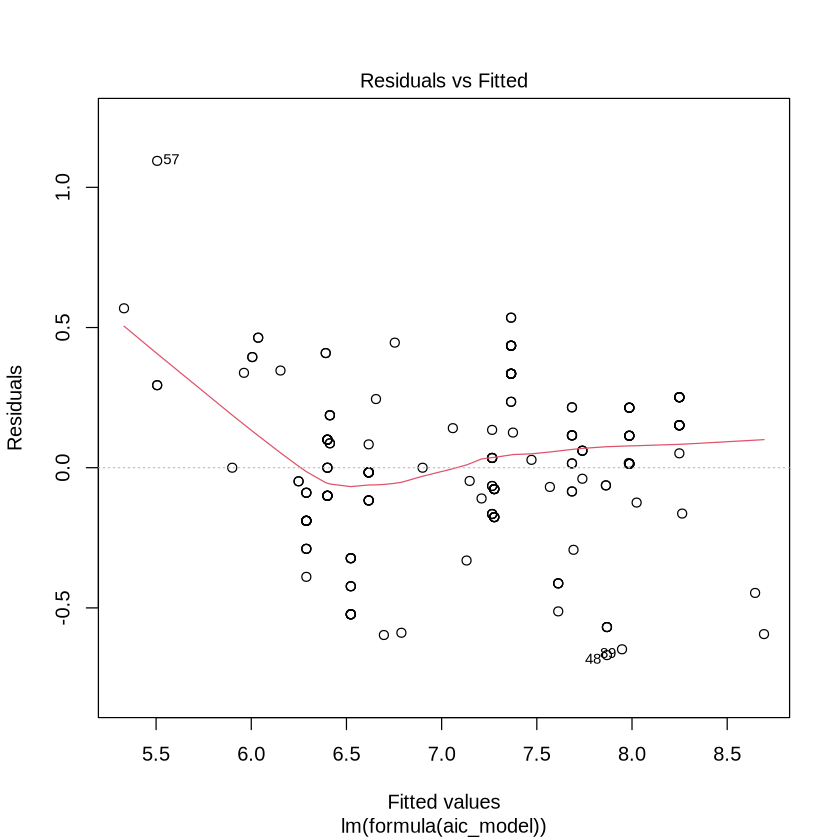

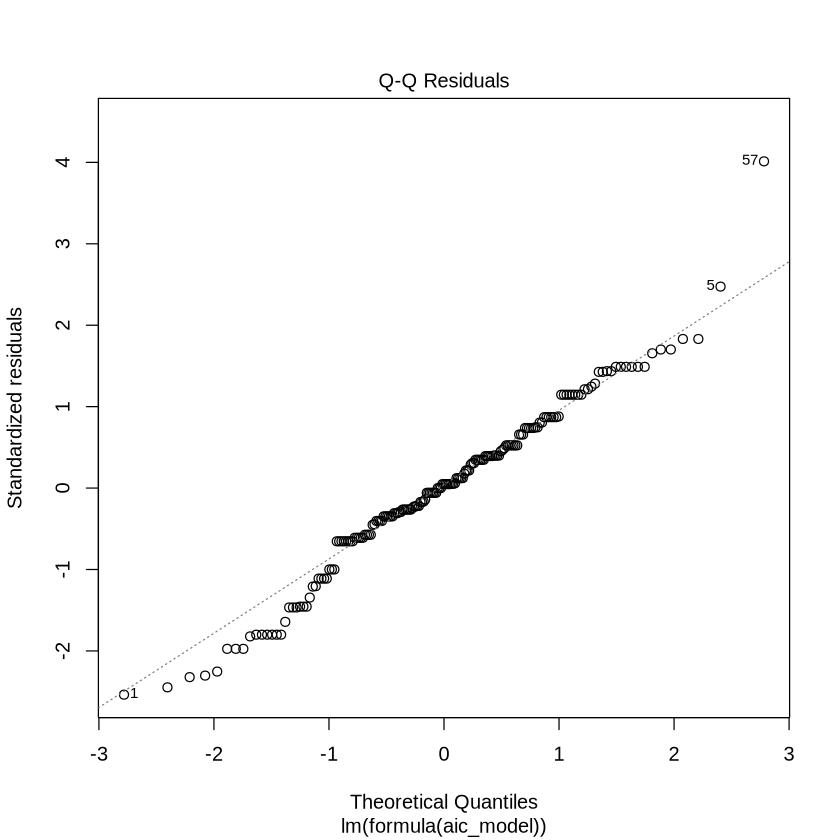

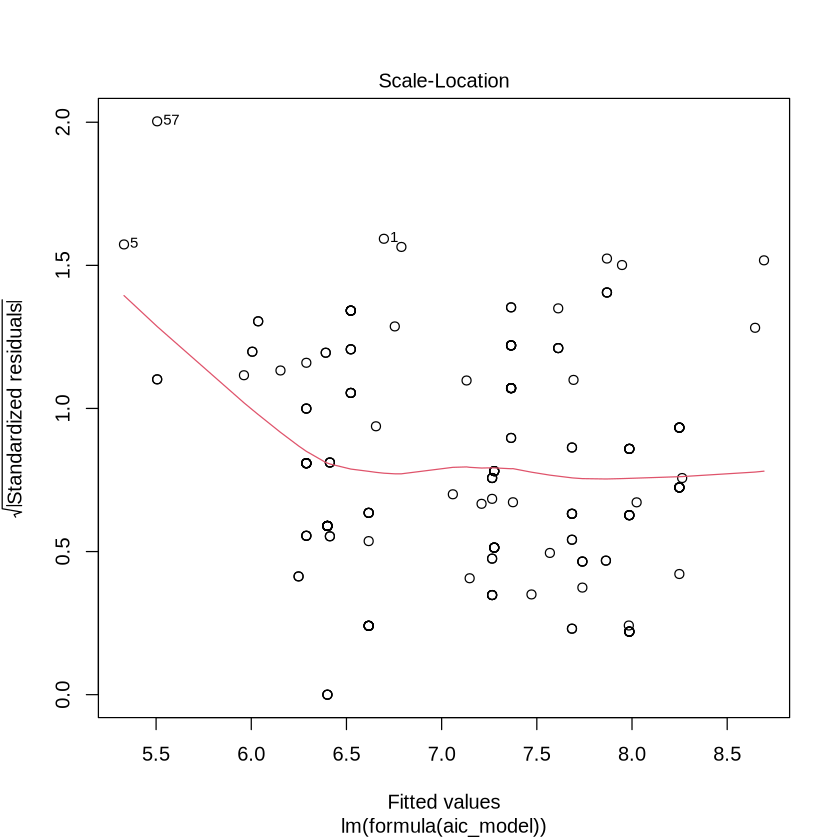

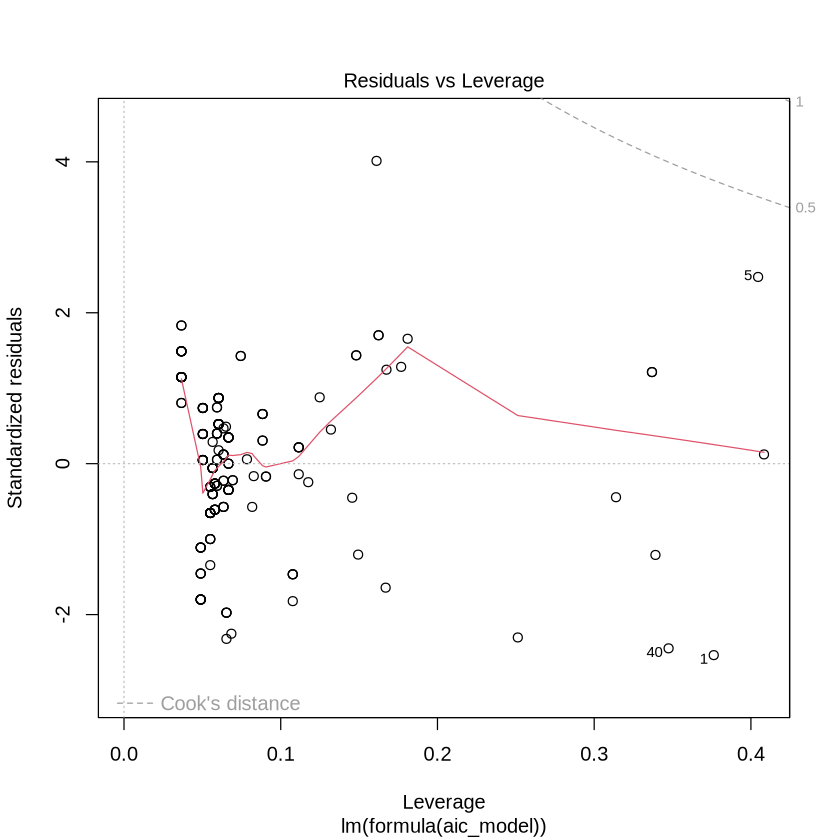

In [18]:
plot(inference_model)

### Interpretation:
No major problems or violations.

# Discussion

Our analysis explored the relationships between sleep duration and a range of predictors using a linear regression model applied to the Sleep Health and Lifestyle Dataset. The results provide valuable insights into the factors associated with sleep duration, while also highlighting the complexity of sleep health.

### Key Findings

The model identified several significant associations. SleepQuality and PhysicalActivity were positively linked to sleep duration, suggesting that better sleep quality and higher physical activity levels contribute to longer sleep. In contrast, StressLevel and SystolicPressure showed negative associations, indicating that elevated stress and blood pressure are linked to shorter sleep, aligning with Khan and Aouad (2017) on stress and cardiovascular impacts on sleep.

Age had a modest positive association, implying that older individuals tend to sleep longer, very likely due to age-related changes in lifestyle or sleep needs. The negative association with Daily1000Steps was unexpected, as it is also a form of physical activity,  we suspect this unlikely result to be due to multicollinearity, although not handled by stepAIC. Occupation also played a significant role. Professions like OccupationDoctor , OccupationSalesRepresentative , and OccupationLawyer were associated with longer sleep duration compared to the reference group, potentially due to differences in work schedules or socioeconomic factors. However, OccupationManager showed no significant effect, indicating that occupational influences on sleep are not uniform.

Interestingly, SleepDisorderPresent was positively associated with sleep duration, a counterintuitive finding. This could reflect compensatory behaviors, such as spending more time in bed to offset poor sleep quality, or it may point to a limitation in the data or model specification.

The model’s adjusted R-squared of 0.9043 indicates that it explains a substantial portion of the variability in sleep duration, with a residual standard error of 0.2484 suggesting a good fit. However, residuals ranging from -0.8889 to 0.9432 hint at some unaccounted variability, possibly due to omitted factors like diet or mental health.

### Limitations
Several limitations temper these findings:
- While associations are clear, we cannot determine whether predictors like stress or physical activity directly influence sleep duration. 
- The sample size (374 observations) is relatively small, potentially limiting the generalizability of results, especially for less-represented occupations or conditions like sleep disorders.
- Also, the fact that this dataset is generated might make it not so representative of the actual population. 
Self-reported measures (if we consider the dataset as a result of random survey), such as sleep quality and stress level, may introduce bias due to subjectivity. 
- Lastly, the unexpected positive association with sleep disorders gives suspicious results, as it could stem from unmeasured confounders or data artifacts.

### Implications and Future Directions
These findings underscore the multifaceted nature of sleep health. The positive roles of sleep quality and physical activity suggest that interventions promoting exercise and sleep hygiene could enhance sleep duration. Conversely, the negative effects of stress and systolic pressure highlight the need for stress management and cardiovascular health strategies in sleep interventions. Occupation-specific differences suggest that workplace wellness programs could be tailored to support sleep health, particularly in high-stress roles.

In conclusion, this analysis reveals significant associations between sleep duration and a range of lifestyle and health-related factors. While the model offers robust explanatory power, its cross-sectional design and reliance on self-reported data call for cautious interpretation. Future research could leverage longitudinal data, objective measures (e.g., actigraphy for sleep, wearable devices for activity), and additional variables (e.g., diet, mental health) to strengthen these findings. Exploring interactions between factors, such as stress and physical activity, could further illuminate their combined effects on sleep. These steps would enhance our understanding of sleep health and inform targeted strategies to improve well-being.

# 4. References:

Grandner, M. A. (2017). Sleep, health, and society. Sleep Medicine Clinics, 12(1), 1–22. https://doi.org/10.1016/j.jsmc.2016.10.012

Khan, M. S., & Aouad, R. (2017). The effects of insomnia and sleep loss on cardiovascular disease. Sleep Medicine Clinics, 12(2), 167–177. https://doi.org/10.1016/j.jsmc.2017.01.005

Medic, G., Wille, M., & Hemels, M. E. (2017). Short- and long-term health consequences of sleep disruption. Nature and Science of Sleep, 9, 151–161. https://doi.org/10.2147/NSS.S134864